Постановка задачи:
Данный датасет был получен из 800 сканов"Avila Bible" - это большой перевод на Латынь библии. Она была создана в 12 веке итальянцами и испанцами. Каллиграфический анализ выявил что данная копия была создана 12 разными переводчиками. Каждый переводчик написал определенное количество страниц, но оно не равное между ними. Были выделены 10 признаков по которым можно попытаться предсказать, кем именно из переводчиков была написана та или иная страница перевода. Задачей является автоматическое распределение по признакам (расстояние между колонками, отступы, итд.) страниц и писателей.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

with open('./avila-tr.csv') as file:
    data = pd.read_csv(file, sep=',', header=None,  engine='python')
    data.columns = ['intercolumnar distance', 'upper margin', 'lower margin', 'exploitation', 'row number', 'modular ratio', 'interlinear spacing', 'weight', 'peak number', 'modular ratio/ interlinear spacing', 'class']

In [2]:
data.describe()

intercolumnar distance  upper margin  lower margin  exploitation  \
count            10430.000000  10430.000000  10430.000000  10430.000000   
mean                 0.000852      0.033611     -0.000525     -0.002387   
std                  0.991431      3.920868      1.120202      1.008527   
min                 -3.498799     -2.426761     -3.210528     -5.440122   
25%                 -0.128929     -0.259834      0.064919     -0.528002   
50%                  0.043885     -0.055704      0.217845      0.095763   
75%                  0.204355      0.203385      0.352988      0.658210   
max                 11.819916    386.000000     50.000000      3.987152   

         row number  modular ratio  interlinear spacing        weight  \
count  10430.000000   10430.000000         10430.000000  10430.000000   
mean       0.006370       0.013973             0.005605      0.010323   
std        0.992053       1.126245             1.313754      1.003507   
min       -4.922215      -7.450257           -11.935457     -4.247781   
25%        0.172340      -0.598658            -0.044076     -0.541992   
50%        0.261718      -0.058835             0.220177      0.111803   
75%        0.261718       0.564038             0.446679      0.654944   
max        1.066121      53.000000            83.000000     13.173081   

        peak number  modular ratio/ interlinear spacing  
count  10430.000000                        10430.000000  
mean       0.012914                            0.000818  
std        1.087665                            1.007094  
min       -5.486218                           -6.719324  
25%       -0.372457                           -0.516097  
50%        0.064084                           -0.034513  
75%        0.500624                            0.530855  
max       44.000000                            4.671232

По данному дескрайбу видно, что существуют выбросы - например, в колонке upper margin максимальное значение 386:
386 >> mean + std*3
Согласно методу среднеквадтратичного отклонения
так же видно, что нет пропущенных значений (строка COUNT)

In [3]:
data.mean()['upper margin'] + (data.std()['upper margin'])*3 # mean+std*3

11.796215980963114

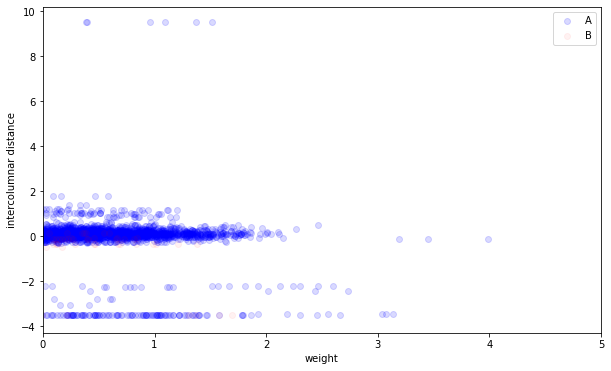

In [4]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['class'] == 'A']['weight'],
            data[data['class'] == 'A']['intercolumnar distance'],
            alpha = 0.15,
            label = 'A',
            color = 'b')

plt.scatter(data[data['class'] == 'C']['weight'],
            data[data['class'] == 'C']['intercolumnar distance'],
            alpha = 0.05,
            label = 'B',
            color = 'r')

plt.xlabel('weight')
plt.xticks(range(6))
plt.xlim(0, 5)
plt.ylabel('intercolumnar distance')
plt.legend()

In [5]:
data.corr()

intercolumnar distance  upper margin  \
intercolumnar distance                            1.000000     -0.037577   
upper margin                                     -0.037577      1.000000   
lower margin                                      0.034473      0.414578   
exploitation                                     -0.065338      0.002026   
row number                                        0.451966     -0.067759   
modular ratio                                    -0.044663      0.424384   
interlinear spacing                              -0.001173      0.582443   
weight                                           -0.043336      0.041227   
peak number                                       0.059427      0.349011   
modular ratio/ interlinear spacing               -0.002839     -0.024810   

                                    lower margin  exploitation  row number  \
intercolumnar distance                  0.034473     -0.065338    0.451966   
upper margin                            0.414578      0.002026   -0.067759   
lower margin                            1.000000      0.143608    0.011333   
exploitation                            0.143608      1.000000    0.096426   
row number                              0.011333      0.096426    1.000000   
modular ratio                           0.132723      0.257627    0.039824   
interlinear spacing                     0.289165      0.043915    0.026447   
weight                                  0.034970      0.338970   -0.071220   
peak number                             0.193194      0.281239    0.274883   
modular ratio/ interlinear spacing     -0.045392      0.323915    0.151590   

                                    modular ratio  interlinear spacing  \
intercolumnar distance                  -0.044663            -0.001173   
upper margin                             0.424384             0.582443   
lower margin                             0.132723             0.289165   
exploitation                             0.257627             0.043915   
row number                               0.039824             0.026447   
modular ratio                            1.000000             0.462871   
interlinear spacing                      0.462871             1.000000   
weight                                  -0.059628             0.002444   
peak number                              0.214207             0.272458   
modular ratio/ interlinear spacing       0.755992             0.263015   

                                      weight  peak number  \
intercolumnar distance             -0.043336     0.059427   
upper margin                        0.041227     0.349011   
lower margin                        0.034970     0.193194   
exploitation                        0.338970     0.281239   
row number                         -0.071220     0.274883   
modular ratio                      -0.059628     0.214207   
interlinear spacing                 0.002444     0.272458   
weight                              1.000000     0.487543   
peak number                         0.487543     1.000000   
modular ratio/ interlinear spacing -0.016045     0.186226   

                                    modular ratio/ interlinear spacing  
intercolumnar distance                                       -0.002839  
upper margin                                                 -0.024810  
lower margin                                                 -0.045392  
exploitation                                                  0.323915  
row number                                                    0.151590  
modular ratio                                                 0.755992  
interlinear spacing                                           0.263015  
weight                                                       -0.016045  
peak number                                                   0.186226  
modular ratio/ interlinear spacing                            1.000000

In [6]:
data.describe(include = ['object'])

class
count   10430
unique     12
top         A
freq     4286

Категориальные признаки

In [7]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [8]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['class']


In [9]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['class_A', 'class_B', 'class_C', 'class_D', 'class_E', 'class_F',
       'class_G', 'class_H', 'class_I', 'class_W', 'class_X', 'class_Y'],
      dtype='object')


In [10]:
data['upper margin'].dtype

dtype('float64')

In [107]:
numerical_columns   = ['intercolumnar distance', 'upper margin', 'lower margin', 'exploitation', 'row number', 'modular ratio', 'interlinear spacing', 'weight', 'peak number', 'modular ratio/ interlinear spacing']
print(numerical_columns)
data_numerical = data[numerical_columns]
data_normalized = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_normalized.describe()


['intercolumnar distance', 'upper margin', 'lower margin', 'exploitation', 'row number', 'modular ratio', 'interlinear spacing', 'weight', 'peak number', 'modular ratio/ interlinear spacing']


intercolumnar distance  upper margin  lower margin  exploitation  \
count            1.029300e+04  1.029300e+04  1.029300e+04  1.029300e+04   
mean             3.486098e-17  2.761266e-17  2.209013e-17  1.794823e-17   
std              1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min             -4.722869e+00 -2.653468e+00 -3.267640e+00 -3.711890e+00   
25%             -1.481484e-01 -2.799394e-01  7.958072e-02 -5.916583e-01   
50%              8.645286e-02 -4.690196e-02  2.358577e-01  8.280292e-02   
75%              3.042967e-01  2.379215e-01  3.739620e-01  6.799711e-01   
max              6.169325e+00  2.141843e+01  5.625573e+00  4.230470e+00   

         row number  modular ratio  interlinear spacing        weight  \
count  1.029300e+04   1.029300e+04         1.029300e+04  1.029300e+04   
mean  -1.905273e-16  -2.209013e-17        -3.486098e-16 -7.593481e-18   
std    1.000000e+00   1.000000e+00         1.000000e+00  1.000000e+00   
min   -5.177280e+00  -4.521871e+00        -7.721424e+00 -4.344095e+00   
25%    1.530785e-01  -6.337886e-01        -8.488427e-02 -5.560414e-01   
50%    2.465934e-01  -8.438564e-02         2.259052e-01  1.035653e-01   
75%    2.465934e-01   5.495412e-01         4.922955e-01  6.545804e-01   
max    1.088229e+00   5.578692e+00         5.997707e+00  4.050342e+00   

        peak number  modular ratio/ interlinear spacing  
count  1.029300e+04                        1.029300e+04  
mean  -1.035475e-16                        1.829339e-17  
std    1.000000e+00                        1.000000e+00  
min   -4.647566e+00                       -5.279046e+00  
25%   -3.787511e-01                       -5.638784e-01  
50%    3.850140e-02                       -5.501739e-02  
75%    4.878497e-01                        5.401657e-01  
max    3.312329e+00                        4.920616e+00

In [108]:
from scipy import stats
np.seterr(divide='ignore', invalid='ignore')
data_wihout_outliers = data_normalized[(np.abs(stats.zscore(data_normalized)) < 5).all(axis=1)]
print(data_wihout_outliers.describe())
data = data_wihout_outliers

       intercolumnar distance  upper margin  lower margin  exploitation  \
count             9916.000000   9916.000000   9916.000000   9916.000000   
mean                 0.106534     -0.061263     -0.000131      0.015185   
std                  0.559846      0.521972      0.932688      0.976852   
min                 -4.706112     -2.653468     -3.267640     -3.711890   
25%                 -0.131391     -0.279939      0.083216     -0.587543   
50%                  0.103210     -0.055533      0.235858      0.094925   
75%                  0.304297      0.229291      0.370328      0.679971   
max                  4.460087      2.939430      4.437147      4.230470   

        row number  modular ratio  interlinear spacing       weight  \
count  9916.000000    9916.000000          9916.000000  9916.000000   
mean      0.147222       0.011026             0.024165    -0.010113   
std       0.540079       0.983180             0.914995     0.989144   
min      -4.990250      -4.521871       

In [109]:
data = pd.concat((data_normalized, data_nonbinary),sort=False, axis = 1)
print(data.shape)

(10293, 22)


In [110]:
data.describe()

intercolumnar distance  upper margin  lower margin  exploitation  \
count            1.029300e+04  1.029300e+04  1.029300e+04  1.029300e+04   
mean             3.486098e-17  2.761266e-17  2.209013e-17  1.794823e-17   
std              1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min             -4.722869e+00 -2.653468e+00 -3.267640e+00 -3.711890e+00   
25%             -1.481484e-01 -2.799394e-01  7.958072e-02 -5.916583e-01   
50%              8.645286e-02 -4.690196e-02  2.358577e-01  8.280292e-02   
75%              3.042967e-01  2.379215e-01  3.739620e-01  6.799711e-01   
max              6.169325e+00  2.141843e+01  5.625573e+00  4.230470e+00   

         row number  modular ratio  interlinear spacing        weight  \
count  1.029300e+04   1.029300e+04         1.029300e+04  1.029300e+04   
mean  -1.905273e-16  -2.209013e-17        -3.486098e-16 -7.593481e-18   
std    1.000000e+00   1.000000e+00         1.000000e+00  1.000000e+00   
min   -5.177280e+00  -4.521871e+00        -7.721424e+00 -4.344095e+00   
25%    1.530785e-01  -6.337886e-01        -8.488427e-02 -5.560414e-01   
50%    2.465934e-01  -8.438564e-02         2.259052e-01  1.035653e-01   
75%    2.465934e-01   5.495412e-01         4.922955e-01  6.545804e-01   
max    1.088229e+00   5.578692e+00         5.997707e+00  4.050342e+00   

        peak number  modular ratio/ interlinear spacing  ...       class_C  \
count  1.029300e+04                        1.029300e+04  ...  10293.000000   
mean  -1.035475e-16                        1.829339e-17  ...      0.010007   
std    1.000000e+00                        1.000000e+00  ...      0.099537   
min   -4.647566e+00                       -5.279046e+00  ...      0.000000   
25%   -3.787511e-01                       -5.638784e-01  ...      0.000000   
50%    3.850140e-02                       -5.501739e-02  ...      0.000000   
75%    4.878497e-01                        5.401657e-01  ...      0.000000   
max    3.312329e+00                        4.920616e+00  ...      1.000000   

            class_D       class_E       class_F      class_G       class_H  \
count  10293.000000  10293.000000  10293.000000  10293.00000  10293.000000   
mean       0.033809      0.105509      0.190032      0.04333      0.049645   
std        0.180747      0.307223      0.392345      0.20361      0.217222   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        0.000000      0.000000      0.000000      0.00000      0.000000   
50%        0.000000      0.000000      0.000000      0.00000      0.000000   
75%        0.000000      0.000000      0.000000      0.00000      0.000000   
max        1.000000      1.000000      1.000000      1.00000      1.000000   

            class_I       class_W       class_X       class_Y  
count  10293.000000  10293.000000  10293.000000  10293.000000  
mean       0.076751      0.003498      0.050520      0.025843  
std        0.266209      0.059039      0.219026      0.158674  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000      0.000000  
max        1.000000      1.000000      1.000000      1.000000  

[8 rows x 22 columns]

In [118]:
class_columns = [c for c in data.columns if 'class' in c]
print(class_columns)

['class_A', 'class_B', 'class_C', 'class_D', 'class_E', 'class_F', 'class_G', 'class_H', 'class_I', 'class_W', 'class_X', 'class_Y']


In [119]:
print(y)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [112]:
X = data.drop(class_columns, axis = 1) # выбрасываем столбец 'class'
y = data_nonbinary
feature_names = X.columns

In [113]:
type(feature_names)

pandas.core.indexes.base.Index

In [114]:
feature_names

Index(['intercolumnar distance', 'upper margin', 'lower margin',
       'exploitation', 'row number', 'modular ratio', 'interlinear spacing',
       'weight', 'peak number', 'modular ratio/ interlinear spacing'],
      dtype='object')

In [19]:
X = X.to_numpy()

In [117]:
#y = y.to_numpy()
print(y)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

8234 2059


In [96]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
print(y_train.shape)
print(X_train.shape)
knn.fit(X_train, y_train)

(8234, 12)
(8234, 10)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [23]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [24]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [25]:
err_test

0.0504154682007031

In [26]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 2, 3, 4, 5]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)
best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.29410115021755046 1


Метод К ближайших соседей показывает лучшие результаты при K = 1. Возможно это потому что классы сильно несбалансированны, и для маленьких классов большие K дают худший результат


# Домашка №2:
Применим PCA для сокращения размерности до 2

Для начала избавимся от выбросов. Я взял метод тройного стандартного отклонения, но попробовал изменить константу 3 на 5, так как при 3 выбрасывается около 1.5 тысяч строк, что довольно много. Так же я взял константу побольше в силу того, что классы все же несбалансированны, и некоторые "выбросы" могут на самом деле ими не являться, а просто относиться к редкому классу. При 5 выбрасывается около 137 значений.

In [27]:
from scipy import stats
with open('./avila-tr.csv') as file:
    data = pd.read_csv(file, sep=',', header=None,  engine='python')
    data.columns = ['intercolumnar distance', 'upper margin', 'lower margin', 'exploitation', 'row number', 'modular ratio', 'interlinear spacing', 'weight', 'peak number', 'modular ratio/ interlinear spacing', 'class']
np.seterr(divide='ignore', invalid='ignore')
data_numerical = data[numerical_columns]
data_wihout_outliers = data_numerical[(np.abs(stats.zscore(data_numerical)) < 5).all(axis=1)]
data = data_wihout_outliers
data_numerical = data[numerical_columns]
data_normalized = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_normalized.describe()
data = data_normalized


In [28]:
outliers = data.index.symmetric_difference(data_nonbinary.index)
print(tuple(outliers))
data_nonbinary.drop(outliers, inplace=True)
X = data # выбрасываем столбец 'class'
y = data_nonbinary
feature_names = X.columns
X = X.to_numpy()
y = y.to_numpy()

(11, 71, 321, 369, 372, 426, 452, 513, 735, 818, 869, 1115, 1230, 1289, 1313, 1362, 1390, 1399, 1447, 1479, 1522, 1523, 1566, 1568, 1715, 1724, 1730, 1737, 1745, 1798, 1860, 1886, 1917, 1978, 2036, 2113, 2181, 2199, 2263, 2297, 2351, 2422, 2492, 2615, 2799, 2886, 2896, 2925, 2940, 3000, 3089, 3237, 3250, 3258, 3287, 3290, 3394, 3471, 3566, 3631, 3705, 3762, 4108, 4114, 4204, 4446, 4465, 4507, 4528, 4584, 4608, 4707, 4739, 4769, 4930, 5093, 5108, 5155, 5218, 5233, 5237, 5288, 5355, 5418, 5473, 5708, 5832, 5976, 6022, 6106, 6191, 6213, 6235, 6323, 6346, 6491, 6619, 6798, 6909, 6963, 6994, 7015, 7153, 7207, 7211, 7214, 7303, 7431, 7512, 7607, 7615, 7618, 7739, 8012, 8151, 8465, 8685, 8686, 8814, 8923, 9081, 9191, 9222, 9402, 9458, 9754, 9803, 9819, 9826, 9958, 9999, 10041, 10199, 10240, 10274, 10297, 10423)


In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_сomponents = pca.fit_transform(X)

In [30]:
print(pca)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [31]:
principal_df = pd.DataFrame(data = principal_сomponents, columns = ['component 1', 'component 2'])
principal_df.head(18)

component 1  component 2
0     -0.847702    -0.321352
1     -1.454272     1.273207
2      0.021582     0.323354
3      0.519648     0.495524
4     -0.160692     0.062147
5      1.166979     0.035212
6      2.069325    -0.375167
7      0.790350    -0.927923
8      0.492570    -1.181598
9      0.603167    -0.914456
10     0.271083     0.633839
11     1.364173     0.070072
12    -0.216917    -0.250431
13     0.857752    -2.067145
14     3.465780    -0.210069
15     0.436255    -0.453269
16    -1.674515    -0.198915
17     0.142378    -0.018648

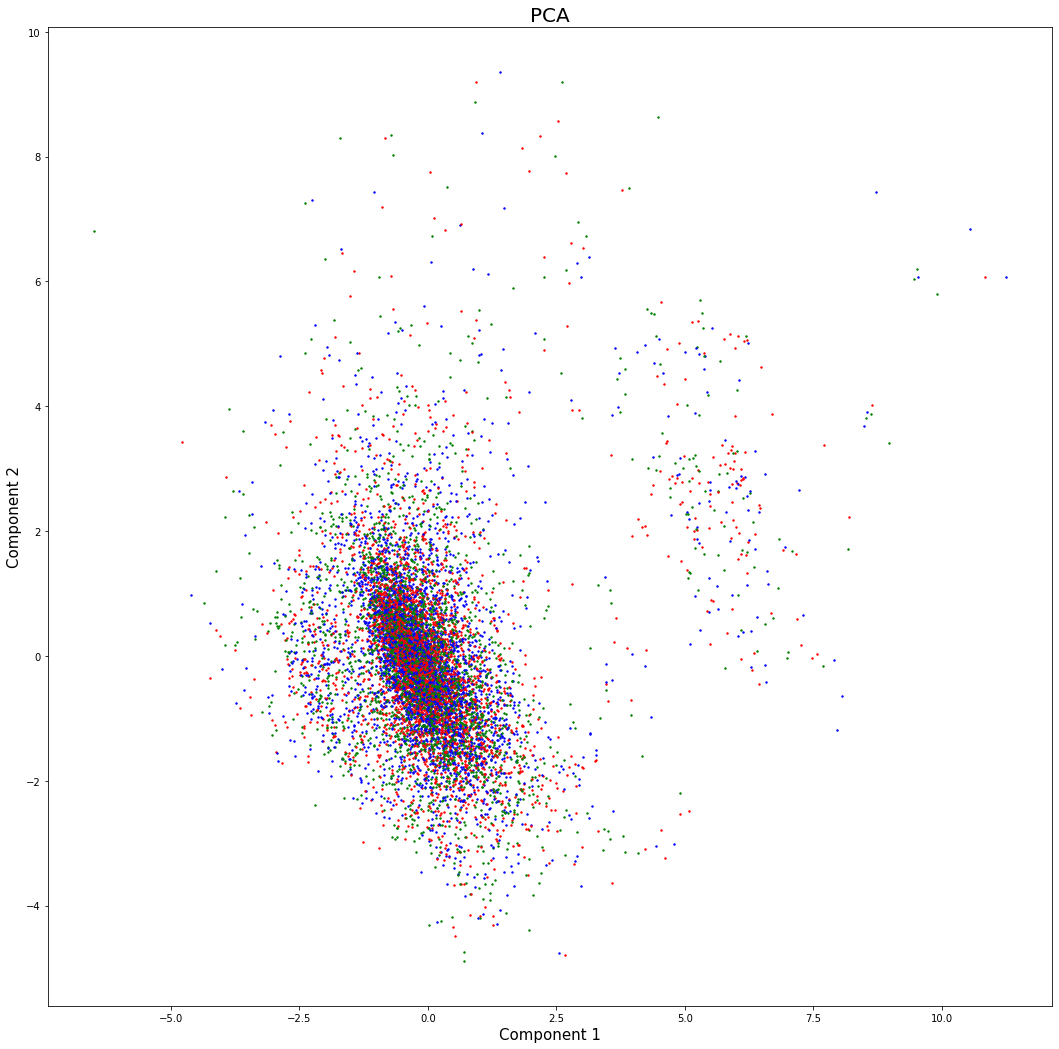

In [32]:
import random
colors = ['r', 'g', 'b']
fig = plt.figure(figsize = (18,18))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
for comp in principal_сomponents:
    ax.scatter(comp[1], comp[0], color = random.choice(colors), s = 2)

In [33]:
explained_variance_ratio = pca.explained_variance_ratio_ 
names = ['principal component 1', 'principal component 2']
for name, var_ratio in zip(names, explained_variance_ratio):
    print('{}: {}%'.format(name, var_ratio * 100))
print('information sum: {}%'.format(sum(explained_variance_ratio) * 100))

principal component 1: 22.524181014916298%
principal component 2: 18.884839532277184%
information sum: 41.40902054719348%


Осталось лишь 41% исходной информации, попробуем запустить kNN...

In [34]:
X_2train, X_2test, y_2train, y_2test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_2train = pca.fit_transform(X_2train)
X_2test = pca.fit_transform(X_2test)

### K-соседи с PCA(2)

In [35]:
knn.fit(X_2train, y_2train)

err_2_train = np.mean(y_2train != knn.predict(X_2train))
err_2_test  = np.mean(y_2test  != knn.predict(X_2test))

print("train_err: {}".format(err_2_train))
print("test_err: {}".format(err_2_test))

train_err: 0.062282406282892076
test_err: 0.08292860611947547


0.0294154682007031 - ошибка без PCA, как и ожидалось работать метод стал хуже. Попробуем поменять PCA

In [36]:
def run_classifier(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    err_train = np.mean(y_train != classifier.predict(x_train))
    err_test  = np.mean(y_test  != classifier.predict(x_test))
    return err_train, err_test
n_components = range(2, 11)

In [37]:
train_err = []
test_err = []
for n in n_components:
  pca = PCA(n_components=n)
  pca.fit(X)
  X_nd_train = pca.transform(X_train)
  X_nd_test = pca.transform(X_test)
  trn_e, tst_e = run_classifier(knn, X_nd_train, y_train, X_nd_test, y_test)
  train_err.append(trn_e)
  test_err.append(tst_e)

Min test_err 0.04725950782997763 with 10 principal components
Max test_err 0.08069670821348673 with 2 principal components
Min train_err 0.03141978267817194 with 9 principal components
Max train_err 0.06205057526366251 with 2 principal components


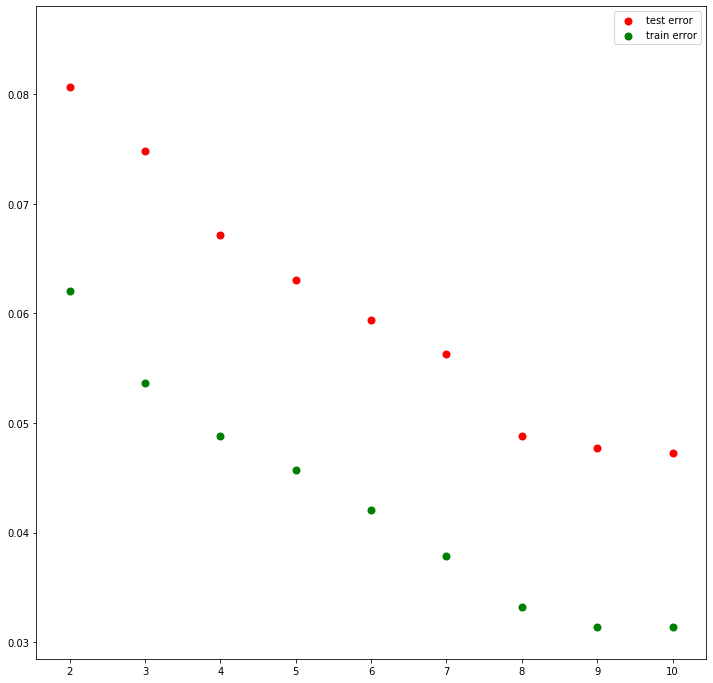

In [38]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1,1,1)
colors = ['r', 'g']
ax.scatter(n_components, test_err, color=colors[0], linewidth=2.)
ax.scatter(n_components, train_err, color=colors[1], linewidth=2.)
ax.legend(['test error', 'train error'])
best_test_result = np.argmin(test_err)
best_train_result = np.argmin(train_err)
worst_test_result = np.argmax(test_err)
worst_train_result = np.argmax(train_err)
print("Min test_err {} with {} principal components".format(test_err[best_test_result], n_components[best_test_result]))
print("Max test_err {} with {} principal components".format(test_err[worst_test_result], n_components[worst_test_result]))
print("Min train_err {} with {} principal components".format(train_err[best_train_result], n_components[best_train_result]))
print("Max train_err {} with {} principal components".format(train_err[worst_train_result], n_components[worst_train_result]))

При уменьшении кол-ва компонент точность так же повышается. После 7 увеличение компонент не так сильно улучшает результат как с при изменении 2 до 7. Попробуем Random Forest

### Случайный лес без PCA:

In [39]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.0028763183125599234


### Random forest С PCA:

Min test_err 0.04578139980824544 with 10 principal components
Max test_err 0.08245445829338446 with 2 principal components
Min train_err 0.0 with 2 principal components
Max train_err 0.0 with 2 principal components


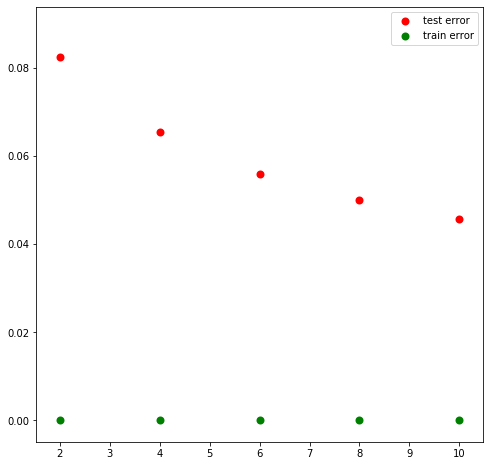

In [40]:
train_err = []
test_err = []
n_components=range(2,12,2)
for n in n_components:
  pca = PCA(n_components=n)
  pca.fit(X)
  X_nd_train = pca.transform(X_train)
  X_nd_test = pca.transform(X_test)
  trn_e, tst_e = run_classifier(rf, X_nd_train, y_train, X_nd_test, y_test)
  train_err.append(trn_e)
  test_err.append(tst_e)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)
ax.scatter(n_components, test_err, color=colors[0], linewidth=2.)
ax.scatter(n_components, train_err, color=colors[1], linewidth=2.)
ax.legend(['test error', 'train error'])
best_test_result = np.argmin(test_err)
best_train_result = np.argmin(train_err)
worst_test_result = np.argmax(test_err)
worst_train_result = np.argmax(train_err)
print("Min test_err {} with {} principal components".format(test_err[best_test_result], n_components[best_test_result]))
print("Max test_err {} with {} principal components".format(test_err[worst_test_result], n_components[worst_test_result]))
print("Min train_err {} with {} principal components".format(train_err[best_train_result], n_components[best_train_result]))
print("Max train_err {} with {} principal components".format(train_err[worst_train_result], n_components[worst_train_result]))

Результаты так же при увеличении размерности улучшаются, но не становятся лучше чем были до уменьшения размерности. Это говорит о том, что все признаки в датасете являются информативными, и при сокращении размерности теряется некоторая важная информация, которая позволяет достичь лучшей точности. Конкретно в случае с данной задачей для решения не стоит применять метод главных компонент, как минимум в представленном выше виде. 

Стоит проверить фичи по значимости:

In [41]:
np.sum(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importance:")

for f in indices:
   print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[int(f)], importances[int(f)]))

Feature importance:
 8. feature 'weight' (0.136477)
 2. feature 'upper margin' (0.123537)
 3. feature 'lower margin' (0.111671)
 9. feature 'peak number' (0.105709)
 1. feature 'intercolumnar distance' (0.097769)
10. feature 'modular ratio/ interlinear spacing' (0.095068)
 6. feature 'modular ratio' (0.087000)
 4. feature 'exploitation' (0.083784)
 5. feature 'row number' (0.082997)
 7. feature 'interlinear spacing' (0.075989)


Как видно, все признаки имеют примерно одинаковую значимость, что подтверждает предположение выше. Возможно если покрутить параметры PCA, то получится улучшить результаты.

# Домашка №3

In [42]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 11)
mlp_model.fit(X_train, y_train)

/home/vsevolod/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=11, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [101]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [102]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.042931746417294143 0.04674599320058281


Результаты довольно неплохие вышли, чуть похуже чем предыдущие методы, но можно попробовать покрутить параметры

### Подбор гиперпараметров

In [100]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 11)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

KeyboardInterrupt: 

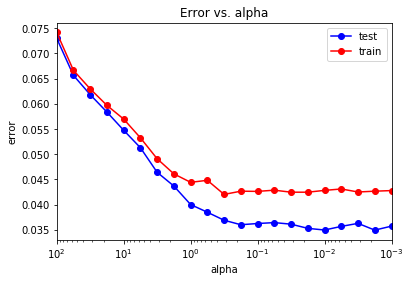

In [46]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Минимальные ошибки:

In [47]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.03494527005433046 0.04202620645573666


In [48]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.31622777]


In [49]:
alpha_opt = alpha_opt[0]

Попробуем теперь обучить с оптимальной альфой

In [50]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 11)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.036902764461489296
0.04202620645573666


/home/vsevolod/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### Confusion matrix

Так же добавим one-hot-encoding чтобы можно было вывести матрицу 

In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix(
    y_test.argmax(axis=1), y_test_pred.argmax(axis=1))

array([[775,   0,   0,   0,   8,  48,   3,   2,   0,   0,   1,   1],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  6,   0,   0,   2,   7,   3,   0,   1,   0,   0,   0,   0],
       [ 39,   0,   0,  13,  12,   5,   0,   0,   0,   0,   0,   0],
       [ 74,   0,   0,   1, 124,   9,   0,   2,   0,   0,   0,   0],
       [219,   0,   0,   0,   2, 178,   9,   1,   0,   0,   0,   0],
       [ 54,   0,   0,   0,   2,   3,  37,   0,   0,   0,   0,   0],
       [ 63,   0,   0,   0,   5,   5,   0,  32,   0,   0,   0,   0],
       [  6,   0,   0,   0,   0,   0,   0,   0, 149,   0,   0,   0],
       [  9,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0],
       [ 23,   0,   0,   0,  11,   0,   0,   0,   0,   0,  70,   5],
       [  1,   0,   0,   0,   2,   1,   0,   0,   1,   0,   6,  26]])

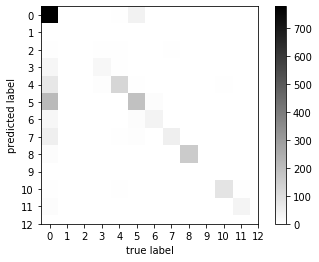

In [52]:
M = confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1))
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(13))
plt.yticks(range(13))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

Согласно матрице, результаты не такие уж и хорошие, очень много сэмплов распознается как нулевой лейбл, что довольно подозрительно.

Посмотрим распределение по лейблам в тестовой выборке для понимания этой матрицы

In [53]:
import numpy
unique, counts = numpy.unique(y_test.argmax(axis=1), return_counts=True)
dict(zip(unique, counts))

{0: 830,
 1: 2,
 2: 27,
 3: 62,
 4: 220,
 5: 417,
 6: 81,
 7: 115,
 8: 173,
 9: 5,
 10: 102,
 11: 52}

Классы ОЧЕНЬ несбалансированы, так что confusion matrix особо ни о чем не говорит нам, посмотреть конечно можно, но гораздо информативнее оценивать по функции потерь. Так же видно, что для 1,2,9 лейбла очень мало семплов, поэтому на конфьюжен матрице их вообще не видно, можно посмотреть чуть нагляднее

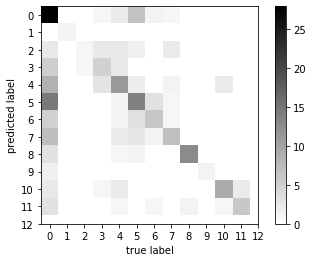

In [54]:
M = confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1))
M = numpy.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(13))
plt.yticks(range(13))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), y_test_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.64      0.94      0.76       830
           1       1.00      1.00      1.00         2
           2       0.50      0.04      0.07        27
           3       0.60      0.42      0.50        62
           4       0.79      0.57      0.66       220
           5       0.73      0.46      0.56       417
           6       0.71      0.48      0.57        81
           7       0.83      0.43      0.57       115
           8       0.99      0.92      0.96       173
           9       1.00      0.40      0.57         5
          10       0.93      0.83      0.88       102
          11       0.88      0.69      0.77        52

    accuracy                           0.72      2086
   macro avg       0.80      0.60      0.66      2086
weighted avg       0.74      0.72      0.70      2086



### Добавление второго слоя

In [56]:
train_err = []
test_err = []
second_layer_range = range(10,100,10)
for second_layer_size in second_layer_range:
    mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes = (100,second_layer_size,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 11)
    mlp_model.fit(X_train, y_train)
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    

/home/vsevolod/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/vsevolod/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/vsevolod/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (

No handles with labels found to put in legend.


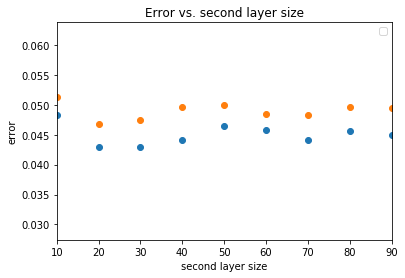

In [57]:
plt.scatter(second_layer_range, train_err)
plt.scatter(second_layer_range, test_err)
plt.xlim([np.min(second_layer_range), np.max(second_layer_range)])
plt.title('Error vs. second layer size')
plt.xlabel('second layer size')
plt.ylabel('error')
plt.legend()


In [58]:
print(np.min(train_err))
print(np.min(test_err))

0.042885107062959414
0.04674017257909875


Если зафиксировать первый слой на 100 нейронах, и оставить старую альфу, то получается что наилучшие результаты сетка показывает при (100,20). Можно так же покрутить размер первого слоя 

In [59]:
train_err = []
test_err = []
first_layer_range = range(10,100,10)
for first_layer_size in first_layer_range:
    mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes = (first_layer_size,20,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 11)
    mlp_model.fit(X_train, y_train)
    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

/home/vsevolod/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/vsevolod/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/vsevolod/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (

No handles with labels found to put in legend.


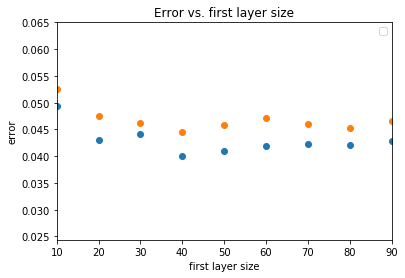

In [60]:
plt.scatter(first_layer_range, train_err)
plt.scatter(first_layer_range, test_err)
plt.xlim([np.min(first_layer_range), np.max(first_layer_range)])
plt.title('Error vs. first layer size')
plt.xlabel('first layer size')
plt.ylabel('error')
plt.legend()


In [61]:
print(np.min(train_err))
print(np.min(test_err))

0.040018775966762545
0.04454298497922659


Получилось еще немного снизить ошибку, получается оптимальный размер слоев - 50,20. Можно конечно продолжить процесс, и дальше запустить перебор на оба слоя, и так же продолжить менять альфу, но скорее всего прирост далее будет небольшой.

# Домашка №4

В домашке 2 стало понятно, что не особо имеет смысл применять PCA для данной задачи, но сказали надо-значит надо...

/home/vsevolod/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/vsevolod/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/vsevolod/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (

Min test_err 0.04586129753914989 with 10 principal components
Max test_err 0.07426494087567913 with 2 principal components
Min train_err 0.04157678171939917 with 10 principal components
Max train_err 0.07454458293384468 with 2 principal components


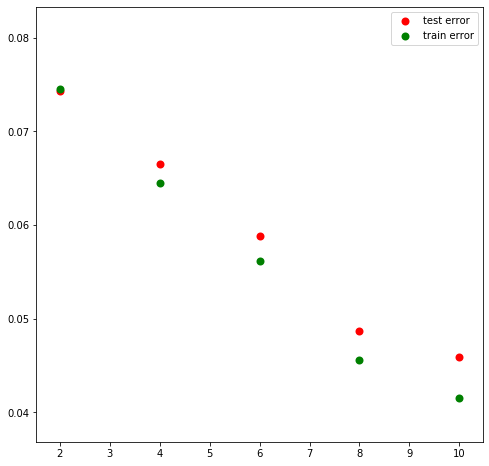

In [62]:
train_err = []
test_err = []
n_components=range(2,12,2)
for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(X)
    X_nd_train = pca.transform(X_train)
    X_nd_test = pca.transform(X_test)
    mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes = (50,20,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 11)
    mlp_model.fit(X_nd_train, y_train)
    y_train_pred = mlp_model.predict(X_nd_train)
    y_test_pred = mlp_model.predict(X_nd_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)
ax.scatter(n_components, test_err, color=colors[0], linewidth=2.)
ax.scatter(n_components, train_err, color=colors[1], linewidth=2.)
ax.legend(['test error', 'train error'])
best_test_result = np.argmin(test_err)
best_train_result = np.argmin(train_err)
worst_test_result = np.argmax(test_err)
worst_train_result = np.argmax(train_err)
print("Min test_err {} with {} principal components".format(test_err[best_test_result], n_components[best_test_result]))
print("Max test_err {} with {} principal components".format(test_err[worst_test_result], n_components[worst_test_result]))
print("Min train_err {} with {} principal components".format(train_err[best_train_result], n_components[best_train_result]))
print("Max train_err {} with {} principal components".format(train_err[worst_train_result], n_components[worst_train_result]))

Запустил MLP с оптимальными параметрами, которые нашел раньше, как видно чем больше компонент тем выше точность, впринципе на 10 компонентах работает не так плохо, но все равно хуже чем без PCA. Попробуем оставить 10 компонент и покрутить параметры

In [63]:
X_nd_train = pca.transform(X_train)
X_nd_test = pca.transform(X_test)

In [64]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 11)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_nd_train)
    y_test_pred = mlp_model.predict(X_nd_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass    

/home/vsevolod/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/vsevolod/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/vsevolod/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (

KeyboardInterrupt: 

Получается примерно то же самое что было без PCA, только чуть хуже

In [ ]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

Для сравнения - без PCA ошибка 0.042665388302972194
Попробуем подобрать оптимальный размер одного слоя

In [ ]:
train_err = []
test_err = []
layer_range = range(10,100,10)
for layer_size in second_layer_range:
    mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes = (layer_size,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 11)
    mlp_model.fit(X_nd_train, y_train)
    y_train_pred = mlp_model.predict(X_nd_train)
    y_test_pred = mlp_model.predict(X_nd_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
plt.scatter(layer_range, train_err)
plt.scatter(layer_range, test_err)
plt.xlim([np.min(layer_range), np.max(layer_range)])
plt.title('Error vs. layer size')
plt.xlabel('layer size')
plt.ylabel('error')
plt.legend()    

In [ ]:
print(np.min(test_err))
print((np.argmin(test_err)+1)*10)

Довольно интересно, что ошибка получилась меньше чем была, скорее всего потому что без PCA я выбрал 100 размер одного слоя, а тут покрутил, и результаты получились чуть лучше. Попробуем оставить оптимальный размер первого слоя, покрутим второй.

In [ ]:
train_err = []
test_err = []
second_layer_range = range(10,100,10)
for second_layer_size in second_layer_range:
    mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes = (70,second_layer_size,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 11)
    mlp_model.fit(X_nd_train, y_train)
    y_train_pred = mlp_model.predict(X_nd_train)
    y_test_pred = mlp_model.predict(X_nd_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
plt.scatter(second_layer_range, train_err)
plt.scatter(second_layer_range, test_err)
plt.xlim([np.min(second_layer_range), np.max(second_layer_range)])
plt.title('Error vs. second layer size')
plt.xlabel('second layer size')
plt.ylabel('error')
plt.legend()

In [ ]:
print(np.min(test_err))
print((np.argmin(test_err)+1)*10)

Попробуем запустить на один слой, но с большим шагом размера слоя, просто чтоб посмотреть что получится

In [ ]:
train_err = []
test_err = []
layer_range = range(100,500,50)
for layer_size in layer_range:
    mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes = (layer_size,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 11)
    mlp_model.fit(X_nd_train, y_train)
    y_train_pred = mlp_model.predict(X_nd_train)
    y_test_pred = mlp_model.predict(X_nd_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
plt.scatter(layer_range, train_err)
plt.scatter(layer_range, test_err)
plt.xlim([np.min(layer_range), np.max(layer_range)])
plt.title('Error vs. layer size')
plt.xlabel('layer size')
plt.ylabel('error')
plt.legend()    

Вот тут видно, что сеть начинает терять в качестве, причем довольно заметно проседает. Возможно это затухание градиентов... Попробуем заменить функцию активации на ReLu

In [ ]:
train_err = []
test_err = []
layer_range = range(100,500,50)
for layer_size in layer_range:
    mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes = (layer_size,), solver = 'lbfgs', 
                          activation = 'relu', random_state = 11)
    mlp_model.fit(X_nd_train, y_train)
    y_train_pred = mlp_model.predict(X_nd_train)
    y_test_pred = mlp_model.predict(X_nd_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
plt.scatter(layer_range, train_err)
plt.scatter(layer_range, test_err)
plt.xlim([np.min(layer_range), np.max(layer_range)])
plt.title('Error vs. layer size')
plt.xlabel('layer size')
plt.ylabel('error')
plt.legend()    

In [ ]:
print(np.min(test_err))
print((np.argmin(test_err)+1)*50)

Получается, что с ReLu и на 900 нейронов сеть показывает наилучший из результатов среди всех MLP. Попробуем убрать PCA...

In [ ]:
train_err = []
test_err = []
mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes = (400,), solver = 'lbfgs', 
                          activation = 'relu', random_state = 11)
mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
test_err = (np.mean(y_test != y_test_pred))
print(test_err)

Результат получился чуть хуже чем с PCA, что меня удивило. Возможно, это просто погрешность, потому что до этого всё говорило о том, что PCA лучше не применять, так как теряется важная информация, но вот с MLP таким образом получилось что PCA имеет смысл.

In [ ]:
#Домашка 5

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [72]:
random_forest = RandomForestClassifier(oob_score=True)

In [81]:
estimators =  np.arange(10, 100, 5)
oob_error_rate, train_error_rate, test_error_rate = [], [], []


for i in estimators:
    random_forest.set_params(n_estimators=i)
    random_forest.fit(X_train, y_train)
    err_train = np.mean(y_train != random_forest.predict(X_train))
    err_test  = np.mean(y_test  != random_forest.predict(X_test))
    oob_error = 1 - random_forest.oob_score_
    train_error_rate.append(err_train)
    test_error_rate.append(err_test)
    oob_error_rate.append(oob_error)

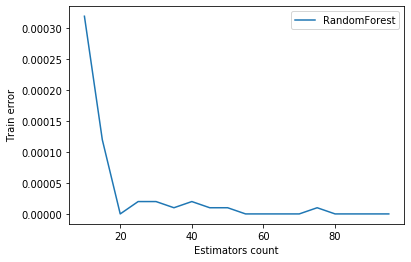

In [82]:
plt.plot(estimators, train_error_rate, label='RandomForest')    
plt.xlabel("Estimators count")
plt.ylabel("Train error")
plt.legend(loc="upper right")
plt.show()


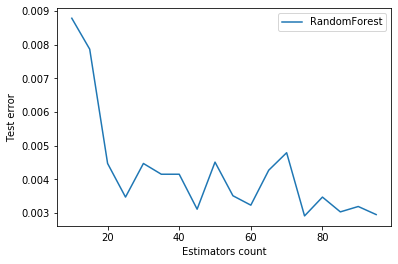

In [83]:
plt.plot(estimators, test_error_rate, label='RandomForest')    
plt.xlabel("Estimators count")
plt.ylabel("Test error")
plt.legend(loc="upper right")
plt.show()

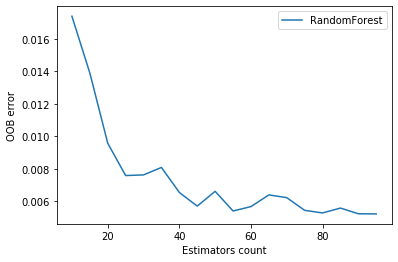

In [84]:
plt.plot(estimators, oob_error_rate, label='RandomForest')    
plt.xlabel("Estimators count")
plt.ylabel("OOB error")
plt.legend(loc="upper right")
plt.show()

С ростом количества простых классификаторов ООБ и ошибка на трейне падают до определенного момента, в то время как ошибка на тесте ведет себя нестабильно,что говорит о переобучении, но в целом величина ошибки настолько мала, что это не играет значительной роли.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
print(y_train.shape)
print(X_train.shape)
dbdt = GradientBoostingClassifier()

err_train = np.mean(y_train != dbdt.predict(X_train))
err_test  = np.mean(y_test  != dbdt.predict(X_test))

print(err_train, err_test)

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
print(y_train.shape)
print(X_train.shape)
dbdt = GradientBoostingClassifier()

err_train = np.mean(y_train != dbdt.predict(X_train))
err_test  = np.mean(y_test  != dbdt.predict(X_test))

print(err_train, err_test)

(8234, 12)
(8234, 10)


ValueError: bad input shape (8234, 12)